# Geographic & Revenue Analysis

### Introduction

The geogrpahic & Revenue Analysis examines how taxi demand and revenue vary across NYC boroughs. While temporal analysis identifies when demand occurs, geographic analysis reveals where revenue and trip cconcentration occur. This enables identification of spatial demand clusters, revenue inequalitu, and operational efficiency differences across boroughs.

##### Why do we need Geographic & Revenue Analysis?

We need Geographic & Revenue Analysis in our project to :
1. Identify high-demand boroughs.
2. Detect revenue concentration zones.
3. Compare fare structures geographically.
4. Measure spatial efficiency differences.
5. Support operational and pricing decisions.

Temporal = When
Geographic = Where
Efficiency = How well

-> Using all above we get to know how Complete Operational Intelligence is!

#### 1 -> Borough-Level Trip Distribution

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_parquet('borough_summary_ready.parquet')

In [51]:
df.head(40)

,borough,zone,total_trips,total_revenue,avg_distance,avg_trip_duration_min,avg_speed_mph,revenue_per_trip,revenue_per_mile,revenue_per_min
0,Manhattan,Upper East Side South,1833988,3.838439e+07,1.711799,12.336262,8.325693,20.929464,12.226592,1.696581
1,Queens,JFK Airport,1779190,1.416761e+08,15.260884,44.184658,20.723325,79.629576,5.217888,1.802200
2,Manhattan,Midtown Center,1743734,4.543988e+07,2.276319,15.827246,8.629369,26.058951,11.447846,1.646462
3,Manhattan,Upper East Side North,1554054,3.278261e+07,1.869216,12.337066,9.090731,21.094900,11.285427,1.709880
4,Manhattan,Penn Station/Madison Sq West,1331927,3.405893e+07,2.225817,16.756144,7.970152,25.571165,11.488441,1.526077
5,Manhattan,Midtown East,1293294,3.231162e+07,2.228812,15.039218,8.891999,24.983973,11.209547,1.661255
6,Manhattan,Times Sq/Theatre District,1227725,3.539763e+07,2.946799,17.159270,10.303932,28.831889,9.784137,1.680252
7,Queens,LaGuardia Airport,1195877,8.256935e+07,9.396158,31.489971,17.903144,69.045015,7.348218,2.192603
8,Manhattan,Lincoln Square East,1130685,2.531286e+07,2.085793,13.057209,9.584558,22.387194,10.733181,1.714547
9,Manhattan,Midtown North,1045328,2.678352e+07,2.345576,15.482520,9.089899,25.622119,10.923596,1.654906


#### Additional NOTE:
For the sake of analyzing the boroughs, since we have not yet re-aggregated the dataset into borough level (as it is now zone-level each row consists of a separate zone with a duplicate borough), we need to aggregate zone-level data into borough level data

In [39]:
# Note -> bs : indicates borough_summary
bs = (
    df.groupby('borough').agg({
        'total_trips':'sum',
        'total_revenue':'sum'
    }).reset_index()
)
bs = bs.sort_values('total_trips', ascending=False)
all_total_trips = bs['total_trips'].sum()
bs['trip_share_pct'] = (
    bs['total_trips'] / all_total_trips * 100
)
bs

,borough,total_trips,total_revenue,trip_share_pct
3,Manhattan,30910117,7.427056e+08,90.009517
4,Queens,3278972,2.428884e+08,9.548288
1,Brooklyn,137762,4.457488e+06,0.401160
0,Bronx,12162,3.875646e+05,0.035415
2,EWR,1150,1.128118e+05,0.003349
5,Staten Island,780,2.621240e+04,0.002271


In [41]:
# Lets make a copy for further analysis in case of any special need for this! :)
bs.to_parquet('aggregated_boroughs.parquet', index=False)

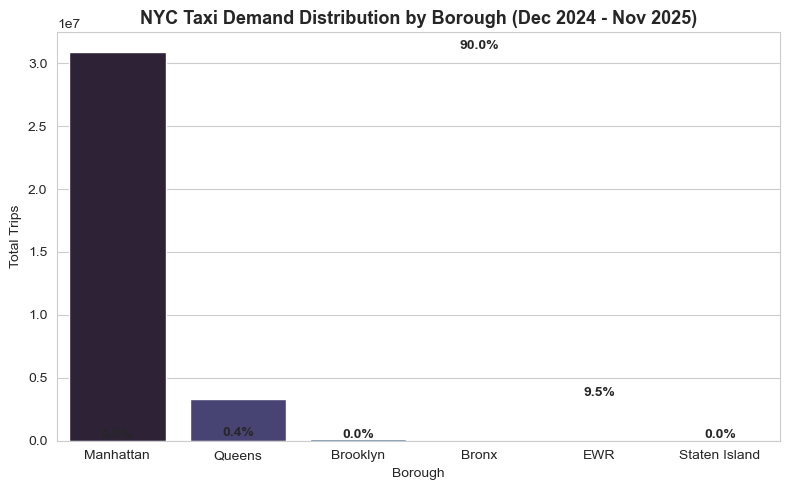

In [50]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')

ax = sns.barplot(
    data=bs,
    x='borough',
    y='total_trips',
    palette='mako',
    legend=False,
    hue='borough'
)

# I will add percent labels here:
for i, row in bs.iterrows():
    ax.text(i,
           row.total_trips,
           f'{row.trip_share_pct:.1f}%',
           ha='center',
           va='bottom',
           fontweight='bold')

plt.title('NYC Taxi Demand Distribution by Borough (Dec 2024 - Nov 2025)',
         fontsize=13,
         weight='bold')
plt.xlabel('Borough')
plt.ylabel('Total Trips')
plt.tight_layout()
plt.show()

In [54]:
df_sorted = df.sort_values('total_trips', ascending=False).reset_index(drop=True)
df_sorted['cum_trips'] = df_sorted['total_trips'].cumsum()
df_sorted['cum_share_pct'] = df_sorted['cum_trips'] / df_sorted['total_trips'].sum() * 100
# Now ranking zones:
df_sorted['zone_rank'] = df_sorted.index + 1

In [55]:
df_sorted

,borough,zone,total_trips,total_revenue,avg_distance,avg_trip_duration_min,avg_speed_mph,revenue_per_trip,revenue_per_mile,revenue_per_min,cum_trips,cum_share_pct,zone_rank
0,Manhattan,Upper East Side South,1833988,3.838439e+07,1.711799,12.336262,8.325693,20.929464,12.226592,1.696581,1833988,5.340529,1
1,Queens,JFK Airport,1779190,1.416761e+08,15.260884,44.184658,20.723325,79.629576,5.217888,1.802200,3613178,10.521487,2
2,Manhattan,Midtown Center,1743734,4.543988e+07,2.276319,15.827246,8.629369,26.058951,11.447846,1.646462,5356912,15.599199,3
3,Manhattan,Upper East Side North,1554054,3.278261e+07,1.869216,12.337066,9.090731,21.094900,11.285427,1.709880,6910966,20.124567,4
4,Manhattan,Penn Station/Madison Sq West,1331927,3.405893e+07,2.225817,16.756144,7.970152,25.571165,11.488441,1.526077,8242893,24.003106,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Manhattan,Governor's Island/Ellis Island/Liberty Island,5,2.932800e+02,14.720000,28.243333,31.271096,58.656000,3.984783,2.076809,34340932,99.999968,256
256,Staten Island,Port Richmond,4,2.418700e+02,6.682500,16.962500,23.637436,60.467500,9.048634,3.564775,34340936,99.999980,257
257,Staten Island,Rossville/Woodrow,3,3.953800e+02,4.003333,6.866667,34.980583,131.793333,32.920899,19.193204,34340939,99.999988,258
258,Staten Island,Arden Heights,3,1.806800e+02,4.563333,19.766667,13.851602,60.226667,13.197955,3.046880,34340942,99.999997,259


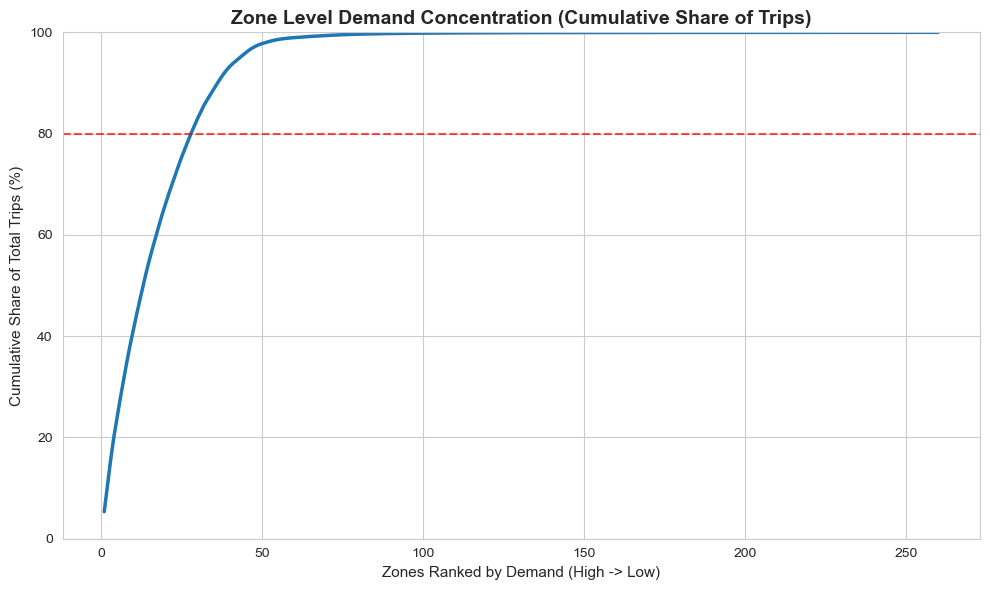

In [59]:
fig, ax = plt.subplots(figsize=(10,6))

# Now, we plot Cumulative Curve
ax.plot(
    df_sorted['zone_rank'],
    df_sorted['cum_share_pct'],
    linewidth=2.5,
    color='#1f77b4'
)

# Reference line at 80% (pareto benchmarking):
ax.axhline(80, linestyle='--', linewidth=1.5, color='red', alpha=0.7)

# Labels and titles:
ax.set_title('Zone Level Demand Concentration (Cumulative Share of Trips)',
            fontsize=14,
            fontweight='bold'
)
ax.set_xlabel('Zones Ranked by Demand (High -> Low)', fontsize=11)
ax.set_ylabel('Cumulative Share of Total Trips (%)', fontsize=11)

ax.set_ylim(0,100)
plt.tight_layout()
plt.show()

##### This means our data is structrually centralized, not evenly distributed.

### Concentration Analysis

In [60]:
### Pareto Thresholds (Top X% Zones Contribution)
total_zones = len(df_sorted)
total_trips = df_sorted['total_trips'].sum()

df_sorted['cum_trips'] = df_sorted['total_trips'].cumsum()
df_sorted['cum_share_pct'] = df_sorted['cum_trips'] / total_trips * 100

# Defining Thresholds here:
percent_levels = [0.1, 0.2, 0.3, 0.5]

for p in percent_levels:
    cutoff_index = int(np.ceil(total_zones * p)) - 1
    share = df_sorted.loc[cutoff_index, 'cum_share_pct']
    print(f'Top {int(p*100)}% zones -> {share:.2f}% of Total Trips')

Top 10% zones -> 76.92% of Total Trips
Top 20% zones -> 98.14% of Total Trips
Top 30% zones -> 99.60% of Total Trips
Top 50% zones -> 99.94% of Total Trips


In [62]:
# Exact 80 % Cutoff
# How many zones generate 80% of total demand?
zones_80 = df_sorted[df_sorted['cum_share_pct'] >= 80].index[0] + 1
zone_share_pct = zones_80 / total_zones * 100

print(f"{zones_80} zones generate 80% of total trips.")
print(f"That represents {zone_share_pct:.2f}% of all zones.")

28 zones generate 80% of total trips.
That represents 10.77% of all zones.


### Report Statement:
Zone-Level cumulative concentration analysis reveals extreme centralization within the NYC Yellow Taxi system. Approximately 10.77% of zones generate 80% of total trips, substantially exceeding the classical Pareto 80/20 benchmark. Nearly all demand is concentrated within the top quintile of zones, indicating a structurally core-dependent urban mobility network driven by a limited set of high-activity geographic clusters.

### Geographic Inequality

In [65]:
def gini(array):
    array = np.sort(np.array(array))
    n = len(array)
    cumulative = np.cumsum(array)
    return (n + 1 - 2 * np.sum(cumulative) / cumulative[-1]) / n

gini_coefficient = gini(bs['total_trips'])
print(f'Gini Coefficient: {gini_coefficient:.3f}')

Gini Coefficient: 0.798


### Report Statement:
Analysis of total trips across NYC boroughs reveals a high concentration of demand. The calculated Gini Coefficient is 0.798, indicating a highly unequal distribution. Most trips occur in a small number of boroughs, while others account for relatively few trips.

In [64]:
min_value_idx = df['total_trips'].idxmin()
max_value_idx = df['total_trips'].idxmax()
min_value_idx, max_value_idx

(259, 0)

#### Borough-Level Revenue Distribution

It answers:
-> How is total revenue distributed geographically?

Variables used in this type of Analysis:

-> Borough

-> Total Revenue

What we should compute:

-> Revenue Share %

-> Revenue per Trip

In [9]:
# Aggregating total revenue and total trips per borough
b_revenue = (
    df.groupby('borough').agg(
        total_revenue = ('total_revenue', 'sum'),
        total_trips = ('total_trips', 'sum')
    ).reset_index()
)

# Revenue Share %
total_revenue_sum = b_revenue['total_revenue'].sum()
b_revenue['revenue_pct'] = (
    b_revenue['total_revenue'] / total_revenue_sum * 100
)

# Revenue Per Trip
b_revenue['revenue_per_trip'] = (
    b_revenue['total_revenue'] / b_revenue['total_trips']
)

# Sorting values in Descending manner based on Total Revenue
b_revenue.sort_values('total_revenue', ascending=False, inplace=True)
b_revenue

,borough,total_revenue,total_trips,revenue_pct,revenue_per_trip
3,Manhattan,7.427056e+08,30910117,74.976988,24.027914
4,Queens,2.428884e+08,3278972,24.519863,74.074558
1,Brooklyn,4.457488e+06,137762,0.449989,32.356444
0,Bronx,3.875646e+05,12162,0.039125,31.866846
2,EWR,1.128118e+05,1150,0.011388,98.097200
5,Staten Island,2.621240e+04,780,0.002646,33.605641


In [10]:
b_revenue.describe()

,total_revenue,total_trips,revenue_pct,revenue_per_trip
count,6.000000e+00,6.000000e+00,6.000000,6.000000
mean,1.650964e+08,5.723490e+06,16.666667,49.004767
std,2.990270e+08,1.240690e+07,30.187116,29.901213
min,2.621240e+04,7.800000e+02,0.002646,24.027914
25%,1.815000e+05,3.903000e+03,0.018323,31.989245
50%,2.422526e+06,7.496200e+04,0.244557,32.981042
75%,1.832807e+08,2.493670e+06,18.502395,63.957329
max,7.427056e+08,3.091012e+07,74.976988,98.097200


## Revenue Distribution

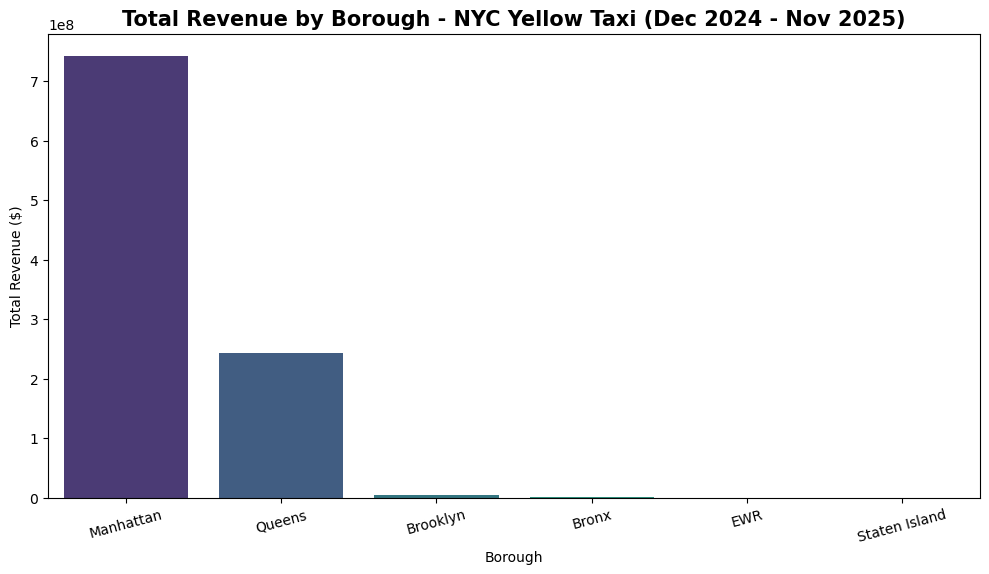

In [11]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=b_revenue,
    x='borough',
    y='total_revenue',
    hue='borough',
    legend=False,
    palette='viridis'
)

plt.title('Total Revenue by Borough - NYC Yellow Taxi (Dec 2024 - Nov 2025)',
         fontsize=15, fontweight='bold')

plt.ylabel('Total Revenue ($)')
plt.xlabel('Borough')

plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


### Report Statement

Manhattan generates the highest total revenue, followed by Queens and Brooklyn. Bronx, EWR, and Staten Island contribute significantly less in absolute terms. The revenue hierarchy confirms that economic taxi activiy is heavily centered in core urban districts.

### Revenue Share %

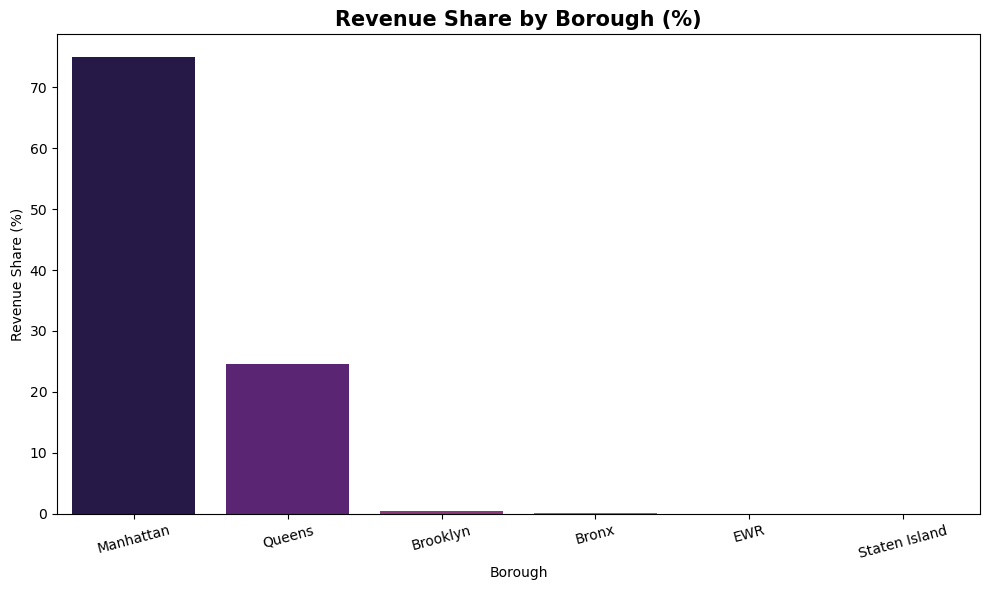

In [12]:
plt.figure(figsize=(10,6))

sns.barplot(
    data=b_revenue,
    x='borough',
    y='revenue_pct',
    palette='magma',
    legend=False,
    hue='borough'
)
plt.title('Revenue Share by Borough (%)', fontsize=15, fontweight='bold')
plt.ylabel('Revenue Share (%)')
plt.xlabel('Borough')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

### Report Statement

Manhattan accounts for approximately 75% of total revenue, while Queens contributes roughly 25%. Brooklyn and other boroughs contribute marginal shares (~2% or lower). This indicates extreme revenue concentration within two primary boroughs.

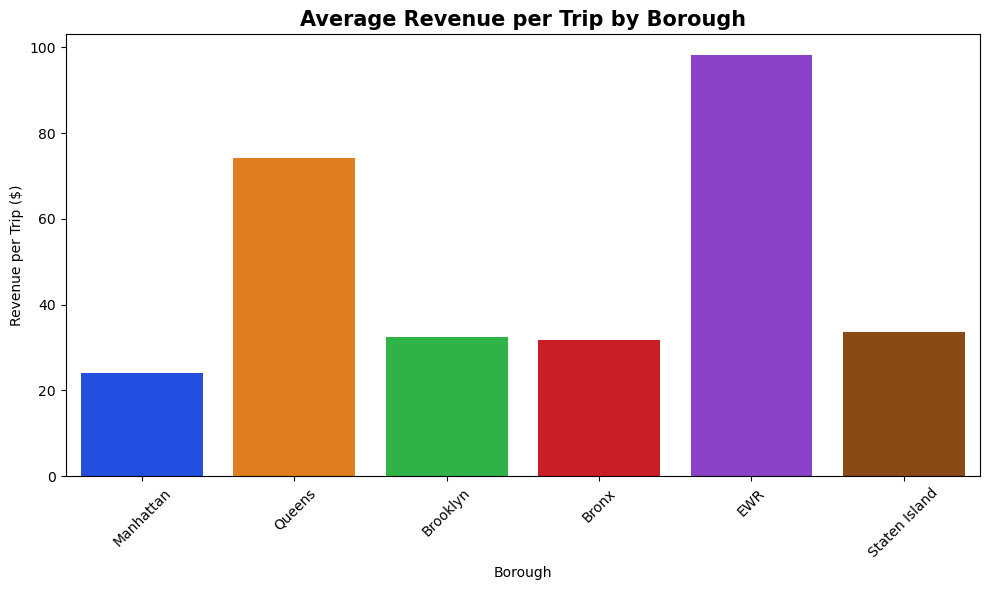

In [32]:
### Revenue Per Trip (Efficiency Perspective)
plt.figure(figsize=(10,6))

sns.barplot(
    data=b_revenue,
    x='borough',
    hue='borough',
    y='revenue_per_trip',
    palette='bright'
)
plt.title('Average Revenue per Trip by Borough', fontsize=15, fontweight='bold')
plt.ylabel('Revenue per Trip ($)')
plt.xlabel('Borough')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Report Statement

Interestingly, revenue efficiency differs from volume dominance.
* EWR (Newark Airport) exhibits the highest revenue per trip (~$90+), reflecting long-distance or airport-based trips.

* Queens ranks second (~$76).

* Manhattan ranks lowest in revenue per trip (~$15), despite leading in total revenue.

This suggests:

* Manhattan drives volume; EWR drives high-value trips.

### Lorenz Curve (Revenue Inequality)

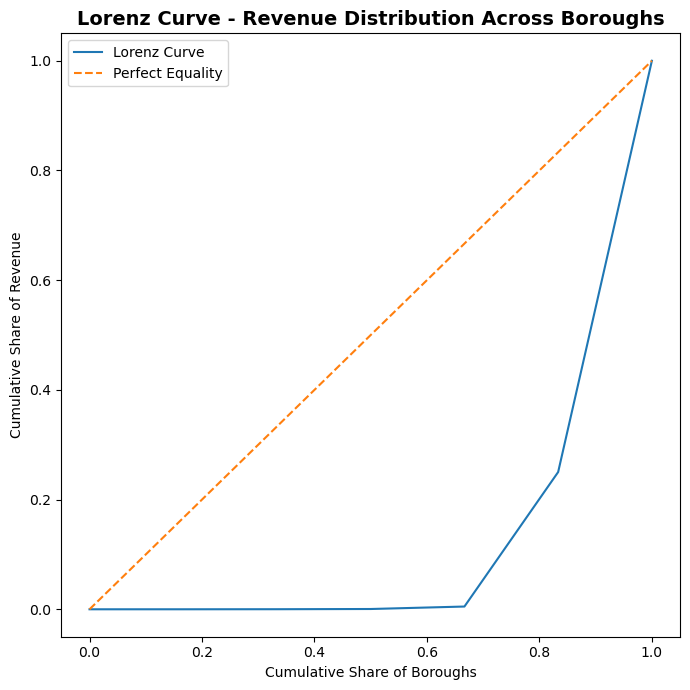

In [37]:
def lorenz_curve(values):
    sorted_vals = np.sort(values)
    cumulative = np.cumsum(sorted_vals)
    cumulative = np.insert(cumulative, 0, 0)
    cumulative = cumulative / cumulative[-1]
    x = np.linspace(0,1,len(cumulative))
    return x, cumulative

x, y = lorenz_curve(b_revenue['total_revenue'].values)

plt.figure(figsize=(7,7))
plt.plot(x,y,label='Lorenz Curve')
plt.plot([0,1],[0,1], linestyle='--', label='Perfect Equality')
plt.title('Lorenz Curve - Revenue Distribution Across Boroughs', fontsize=14,
         fontweight='bold')
plt.xlabel('Cumulative Share of Boroughs')
plt.ylabel('Cumulative Share of Revenue')

plt.legend()
plt.tight_layout()
plt.show()

### Report Statement

The lorenz curve indicates that approximately 80% of boroughs generate only ~24% of total revenue, confirming substantial geographic inequality. Revenue is disproportionately concentrated in a small subset of boroughs.

In [38]:
def gini(array):
    array = np.sort(np.array(array))
    n = len(array)
    cumulative = np.cumsum(array)
    return (n + 1 - 2 * np.sum(cumulative) / cumulative[-1]) / n

gini_revenue = gini(b_revenue['total_revenue'])
print(f'Gini Coefficient (Revenue): {gini_revenue:.3f}')

Gini Coefficient (Revenue): 0.748


#### Do High-Volume Boroguhs also generate higher reveue per Trip?

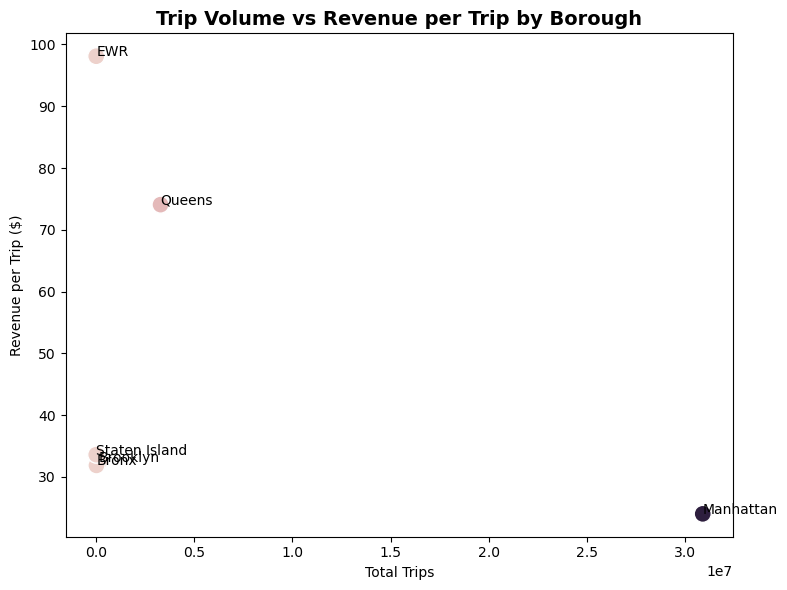

In [63]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    data=b_revenue,
    x='total_trips',
    y='revenue_per_trip',
    hue='total_trips',
    legend=False,
    s=150
)

for i in range(len(b_revenue)):
    plt.text(
        b_revenue['total_trips'].iloc[i],
        b_revenue['revenue_per_trip'].iloc[i],
        b_revenue['borough'].iloc[i]
    )

plt.title('Trip Volume vs Revenue per Trip by Borough', fontsize=14, fontweight='bold')
plt.xlabel('Total Trips')
plt.ylabel('Revenue per Trip ($)')
plt.tight_layout()
plt.show()

### Report Statement

The scatter analysis reveals structural differences:
* Manhattan: High trip volume but low revenue per trip.
* EWR: Near-Zero volume but extremely high revenue per trip.
* Queens: Balanced high volume and high revenue efficiency.
So This Indicates:
* Volume Dominance != Pricing Dominance
* Different boroughs operate under distinct economic dynamics.

In [51]:
import geopandas as gpd


nyc_map = gpd.read_file('new-york-city-boroughs.geojson')

In [54]:
nyc_map.columns
nyc_map.head()
nyc_map['name'].unique()

array(['Staten Island', 'Queens', 'Brooklyn', 'Manhattan', 'Bronx'],
      dtype=object)

In [55]:
b_revenue['borough'].unique()

array(['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'EWR', 'Staten Island'],
      dtype=object)

In [56]:
b_revenue_nyc = b_revenue[b_revenue['borough'].isin(nyc_map['name'])]

In [57]:
map_data = nyc_map.merge(
    b_revenue_nyc[['borough', 'total_revenue']],
    left_on='name',
    right_on='borough',
    how='left'
)

In [58]:
import sys
print(sys.executable)

C:\Users\iqbal\anaconda3\Anaconda\python.exe


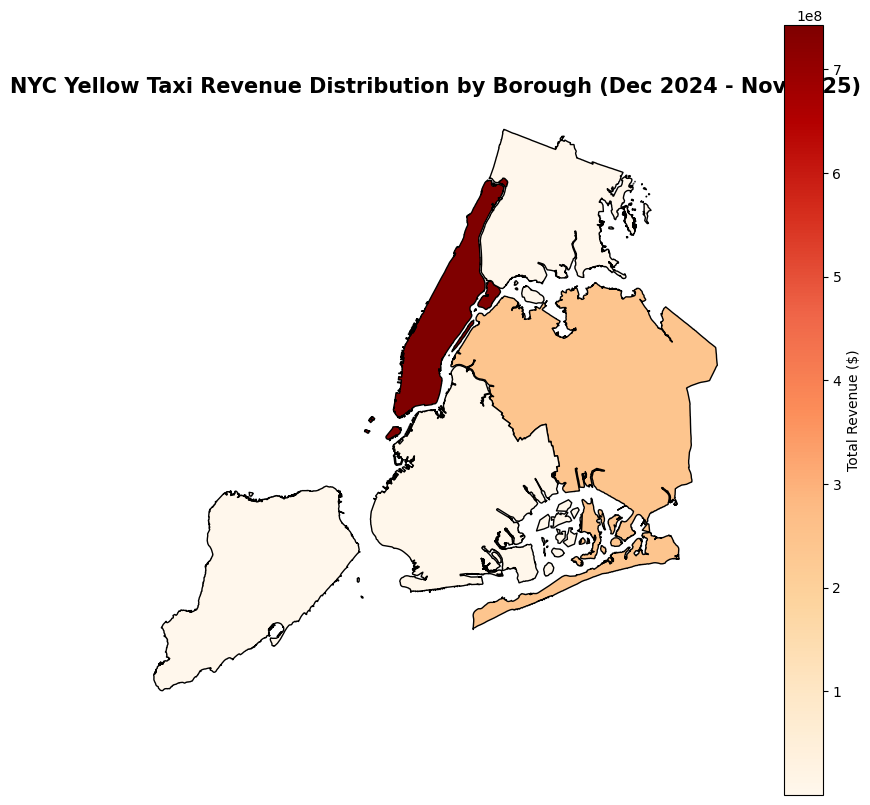

In [59]:
fig, ax = plt.subplots(figsize=(10,10))
map_data.plot(
    column='total_revenue',
    cmap='OrRd',
    linewidth=1,
    edgecolor='black',
    legend=True,
    legend_kwds={'label':'Total Revenue ($)'},
    ax=ax
)

ax.set_title('NYC Yellow Taxi Revenue Distribution by Borough (Dec 2024 - Nov 2025)',
            fontsize=15,
            fontweight='bold')
ax.axis('off')
plt.show()

### Report Statement

#### Geographic Revenue Visualization

The choropleth map confirms Manhattan dominates taxi revenue, followed by Queens and Brooklyn, with Staten Island and Bronx contributing less.
EWR (Newark Airport) generates high revenue per trip but is geographically outside NYC borough boundaries, so it is excluded from the map.
This spatial pattern aligns with the previously calculated Gini Coefficient and Lorenz curve, confirming strong geographic revenue concentration.

#### Fare & Distance Comparison Across Boroughs

This answers:

Are Rides fundamentally different across boroughs?

Variables Used:

-> Avg Fare -> Pricing Level

-> Avg Distance > Ride Length

-> Avg Duration -> Congestion Impact

-> Fare per Mile -> Spatial Efficiency

-> Fare per Minute -> Time-Based Efficiency

What we are analyzing?

-> Is Manhattan fare higher because trips are longer?

-> Or Because fare per mile is higher?

-> Does Congestion increase fare per minute?


### Average Fare Per Mile by Borough

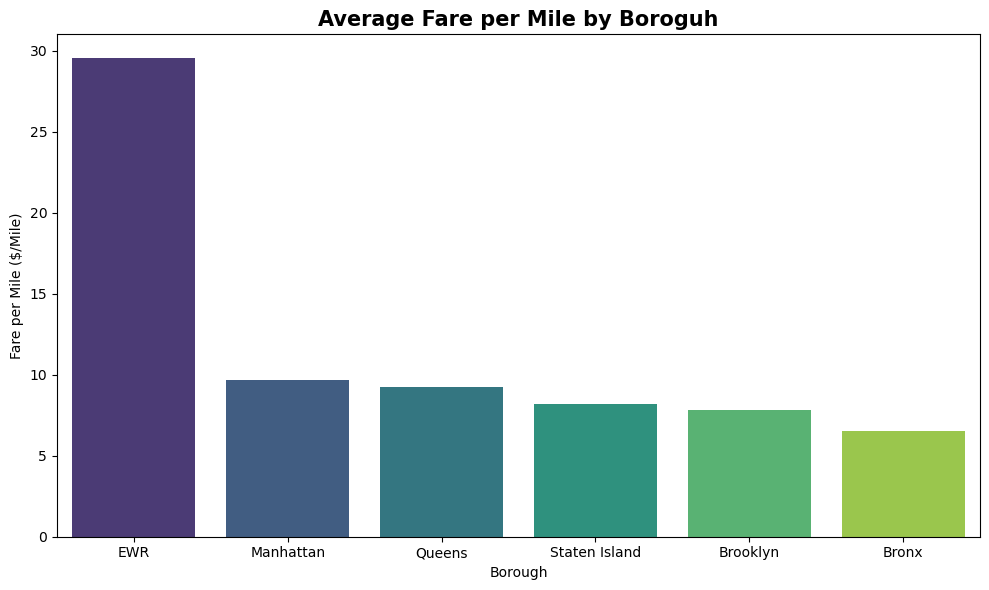

In [106]:
fare_mile_metrics = df.groupby('borough').agg(
    avg_fare_per_mile = ('revenue_per_mile', 'mean'),
    median_fare = ('revenue_per_trip', 'median'),
    avg_distance = ('avg_distance', 'mean')
).reset_index()

# Sorting the values for the sake of visualization
fare_mile_metrics.sort_values('avg_fare_per_mile', ascending=False, inplace=True)

# Bar plot: Avg Fare per Mile
plt.figure(figsize=(10,6))
sns.barplot(
    data=fare_mile_metrics,
    x='borough',
    y='avg_fare_per_mile',
    palette='viridis',
    hue='borough'
)
plt.title('Average Fare per Mile by Boroguh', fontsize=15, fontweight='bold')
plt.xlabel('Borough')
plt.ylabel('Fare per Mile ($/Mile)')
plt.tight_layout()
plt.show()

### Report Statement

The analysis of average fare per mile across NYC boroughs reveals a clear spatial gradient in pricing. EWR (airports) commands the highest fare efficiency at around 30 dollars per mile, reflecting airport surcharges and long-distance trips. Manhattan follows with an average of approximately 10 dollars per mile, elevated due to congestion, short-trip premiums, and dense urban traffic. Queens averages near 9 dollars per mile, while Staten Island and Brooklyn are close to 8 dollars per mile, reflecting longer trips with lower per-mile cost. The Bronx has the lowest fare efficiency at about $6 per mile, consistent with less congestion and longer suburban-style trips. Overall, this pattern demonstrates how trip length, congestion, and surcharges jointly shape fare efficiency across NYC boroughs.

### Fare Distribution Across Boroughs

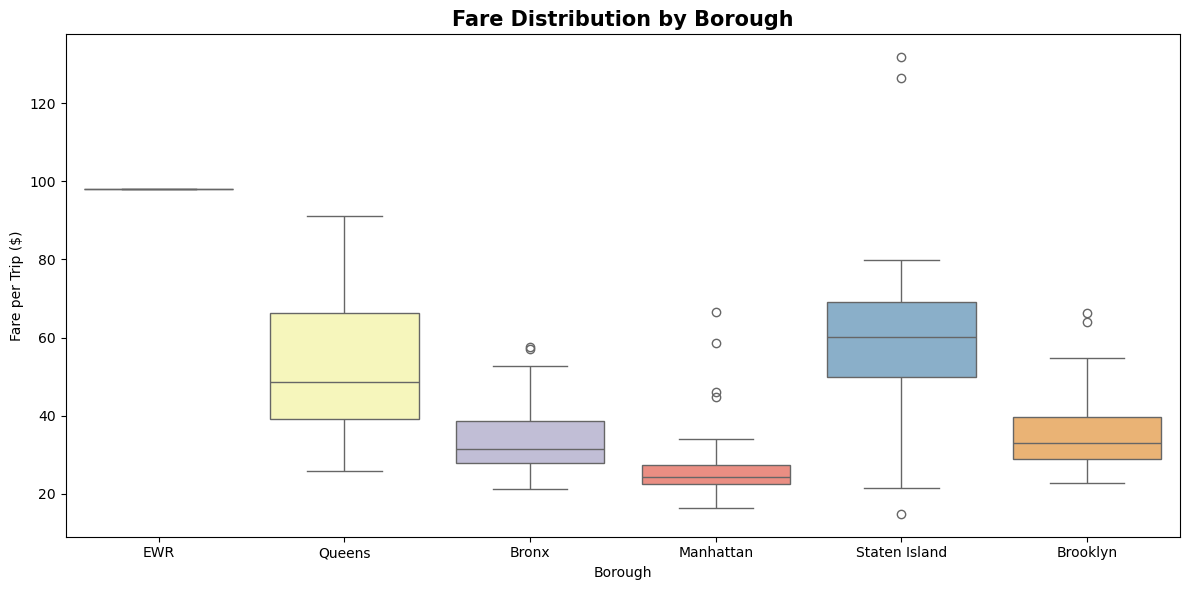

In [79]:
plt.figure(figsize=(12,6))

sns.boxplot(
    data=df,
    x='borough',
    y='revenue_per_trip',
    palette='Set3',
    hue='borough',
    legend=False
)
plt.title('Fare Distribution by Borough', fontsize=15, fontweight='bold')
plt.ylabel('Fare per Trip ($)')
plt.xlabel('Borough')
plt.tight_layout()
plt.show()

### Report Statement

Manhattan dominates with 67 zones and ~30.9 million trips (90% of volume). Fares are tightly clustered (mean 26.43 dollars, median 24.41 dollars, IQR 4.73 dollars), reflecting short, homogeneous intra-borough trips.

Queens (69 zones, ~3.3 million trips, 9.6%) shows the widest fare spread (mean 52.71 dollars, median 48.54 dollars, and IQR of 27.18 dollars), driven by diverse zones and airport traffic.

Brooklyn (61 zones, ~138 trips, 0.4%) has moderate fares (mean of 35.23 dollars, median of 33.13 dollars, and IQR of 10.68 dollars), positioned between Manhattan's low and Queens' high.

The Bronx (43 zones, ~12K trips, 0.035 dollars) mirrors Brooklyn's profile (mean of 33.95 dollars, median of $31.57, and IQR of 10.92 dollars) despite far fewer trips.

Staten Island (19 zones, 780 trips, 0.0023%) shows elevated fares (mean 61.56 dollars, median 60.23 dollars, and IQR of 19.42 dollars), reflecting long-distance crossings, though sample size is minimal.

Newark Airport (EWR) (1 ZONE, 1,150 Trips, 0.0033%) has uniform premium fares (98.10 dollars), consistent with airport transfer pricing.

In [111]:
df['borough'].unique()

array(['EWR', 'Queens', 'Bronx', 'Manhattan', 'Staten Island', 'Brooklyn'],
      dtype=object)

#### Trip Length Patterns

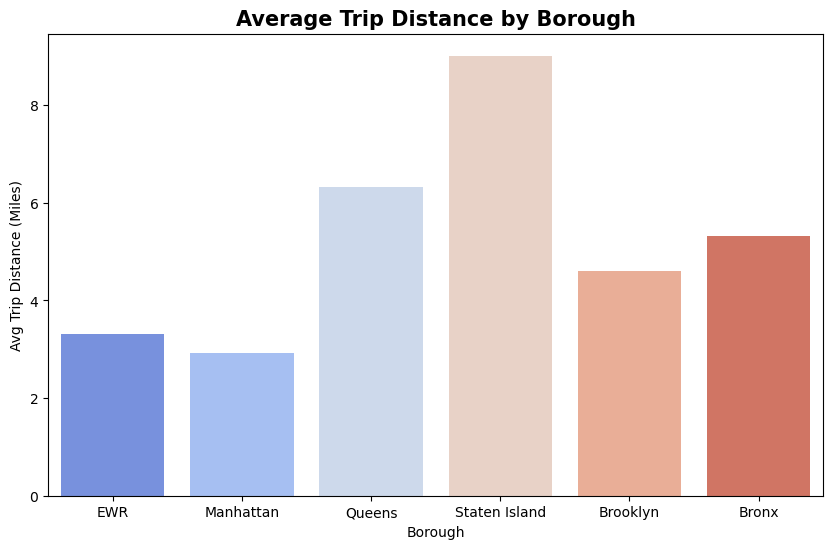

In [80]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=fare_mile_metrics,
    x='borough',
    y='avg_distance',
    palette='coolwarm',
    hue='borough',
    legend=False
)
plt.title('Average Trip Distance by Borough', fontsize=15, fontweight='bold')
plt.ylabel('Avg Trip Distance (Miles)')
plt.xlabel('Borough')
plt.show()

### Report Statement

Analysis of average trip distance across NYC boroughs highlights clear spatial patterns. Trips in Staten Island are the longest, averaging approximately 9.0 miles, followed by Queens at 6.3 miles and the Bronx at 5.3 miles. Brooklyn averages 4.6 miles per trip, while EWR (airports) records about 3.3 miles, reflecting short but high-value airport trips. Manhattan has the shortest trips at roughly 2.9 miles on average, consistent with dense urban congestion and the prevalence of short inner-city journeys. Overall, this pattern demonstrates how trip length varies with borough geography, urban density, and the location of major transportation hubs.

### Correlation of Fare vs Distance by Borough

<Figure size 1200x800 with 0 Axes>

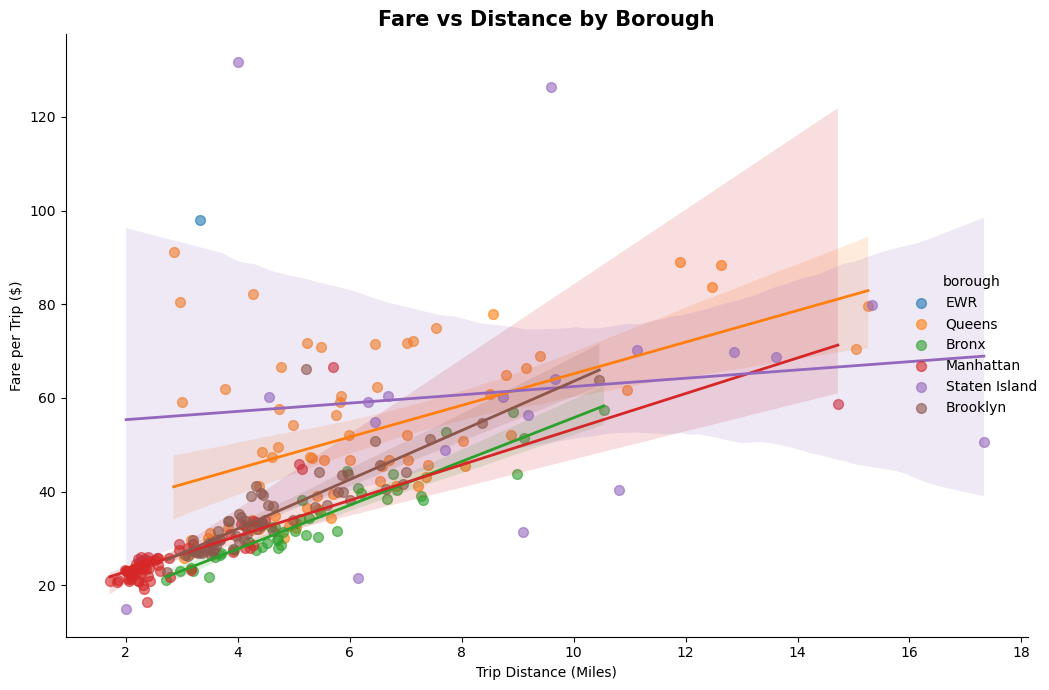

In [84]:
plt.figure(figsize=(12,8))
sns.lmplot(
    data=df,
    x='avg_distance',
    y='revenue_per_trip',
    hue='borough',
    height=7,
    aspect=1.3,
    scatter_kws={'s':50,'alpha':0.6},
    line_kws={'linewidth':2}
)
plt.title('Fare vs Distance by Borough', fontsize=15, fontweight='bold')
plt.xlabel('Trip Distance (Miles)')
plt.ylabel('Fare per Trip ($)')
plt.tight_layout()
plt.show()

#### Fare per Mile vs Distance (Short vs Long Trips)

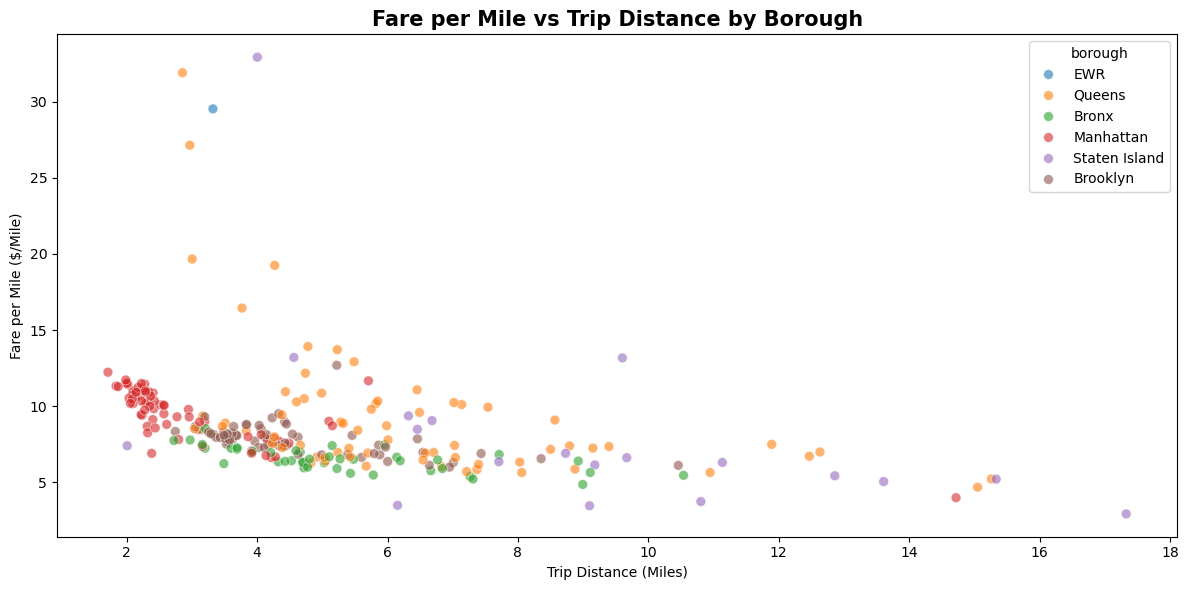

In [89]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df,
    x='avg_distance',
    y='revenue_per_mile',
    hue='borough',
    alpha=0.6,
    s=50
)
plt.title('Fare per Mile vs Trip Distance by Borough', fontsize=15, fontweight='bold')
plt.xlabel('Trip Distance (Miles)')
plt.ylabel('Fare per Mile ($/Mile)')
plt.tight_layout()
plt.show()

In [5]:
df['borough'] = df['borough'].astype('category')

#### Statistical Testing -> (ANOVA)

This Answers: 

--> Are the mean values across multiple groups significantly different?

---> Null Hypothesis : All boroughs have equal mean fare.

---> Alternative Hypothesis: At least one borough has a different mean fare.

-> Variables Used:

---> Dependent Variable: Fare Amount

---> Independent Variable: Borough

Note: In this case use ANOVA test because we have 5 Boroughs to Compare so We do not use T-Test or other type of Tests!


In [8]:
df.dtypes

borough                  category
zone                       object
total_trips                 int64
total_revenue             float64
avg_distance              float64
avg_trip_duration_min     float64
avg_speed_mph             float64
revenue_per_trip          float64
revenue_per_mile          float64
revenue_per_min           float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   borough                260 non-null    category
 1   zone                   260 non-null    object  
 2   total_trips            260 non-null    int64   
 3   total_revenue          260 non-null    float64 
 4   avg_distance           260 non-null    float64 
 5   avg_trip_duration_min  260 non-null    float64 
 6   avg_speed_mph          260 non-null    float64 
 7   revenue_per_trip       260 non-null    float64 
 8   revenue_per_mile       260 non-null    float64 
 9   revenue_per_min        260 non-null    float64 
dtypes: category(1), float64(7), int64(1), object(1)
memory usage: 18.9+ KB


# Statistical Inference

# Till now, we used EDA to generate some hypotheses, now we will answer some of important hypothesis through some statistical methods such as ANOVA.

### Question: Does Operational Performance Differ Geographically?
##### We Test whether average trip distance differs across boroughs or not!
#### Null Hypothesis: The mean avg_distance is equal across all boroughs
#### Alternative Hypothesis: At least one borough has a different mean avg_distance.


### Since our grouping variable is borough (categorical), and the dataset is represented by continuous efficiency metrics such as:
** avg_speed_mph

** avg_trip_duration_min

** avg_distance
### The correct approach is One-Way ANOVA.

In [18]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
import statsmodels.api as sm
print(sm.__version__)

0.14.2


In [19]:
## Ensuring Borough is categorical
df['borough'].dtype
# Yes, It is!

CategoricalDtype(categories=['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens',
                  'Staten Island'],
, ordered=False, categories_dtype=object)

In [ ]:
df_final = df[df['borough'] != 'EWR'].copy()
df_final['borough'] = df_final['borough'].cat.remove_unused_categories()
df_final['borough'].value_counts()

In [42]:
group_summary = df_final.groupby('borough')['avg_distance'].describe()
print(group_summary)

               count      mean       std       min       25%       50%  \
borough                                                                  
Bronx           43.0  5.328437  1.807645  2.724036  4.157575  4.803346   
Brooklyn        61.0  4.605529  1.445864  2.744898  3.578557  4.168821   
Manhattan       67.0  2.927924  1.724660  1.711799  2.190178  2.353435   
Queens          69.0  6.315016  2.680524  2.854798  4.663830  5.672255   
Staten Island   19.0  9.013461  3.921207  2.006667  6.389524  9.099048   

                     75%        max  
borough                              
Bronx           6.167921  10.540667  
Brooklyn        5.388547  10.459455  
Manhattan       3.037767  14.720000  
Queens          7.212963  15.260884  
Staten Island  10.970714  17.330000  


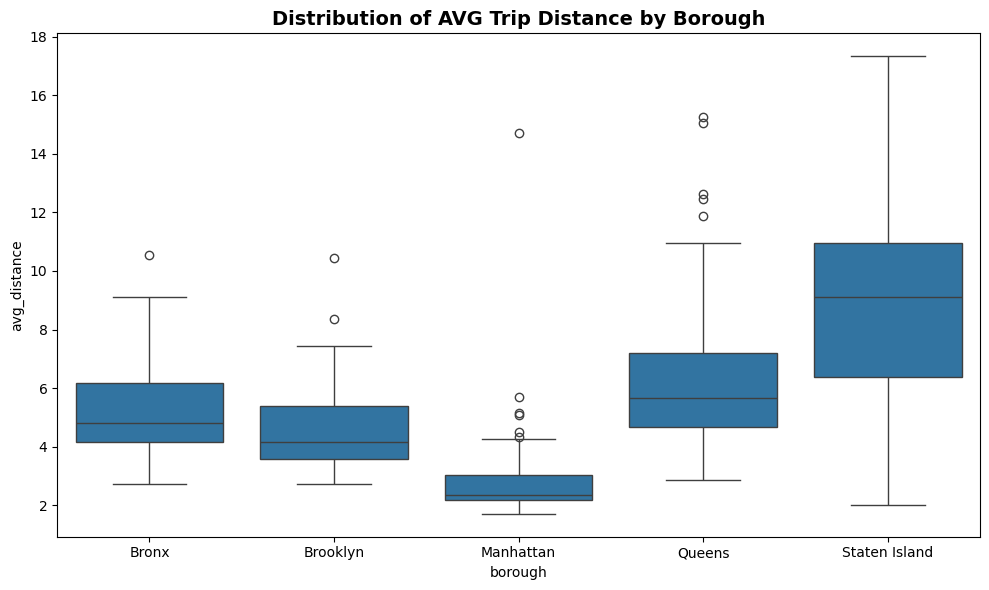

In [43]:
# Visual Inspection
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df_final,
    x='borough',
    y='avg_distance'
)
plt.title('Distribution of AVG Trip Distance by Borough', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

In [29]:
df

,borough,zone,total_trips,total_revenue,avg_distance,avg_trip_duration_min,avg_speed_mph,revenue_per_trip,revenue_per_mile,revenue_per_min
0,EWR,Newark Airport,1150,112811.78,3.322617,8.346101,23.886247,98.097200,29.524073,11.753655
1,Queens,Jamaica Bay,58,4084.37,15.051379,39.061207,23.119684,70.420172,4.678652,1.802816
2,Bronx,Allerton/Pelham Gardens,83,2620.61,5.029398,17.543373,17.201016,31.573614,6.277812,1.799746
3,Manhattan,Alphabet City,41564,1014629.74,2.570325,14.114873,10.926026,24.411263,9.497347,1.729471
4,Staten Island,Arden Heights,3,180.68,4.563333,19.766667,13.851602,60.226667,13.197955,3.046880
...,...,...,...,...,...,...,...,...,...,...
255,Bronx,Woodlawn/Wakefield,97,3851.04,6.193814,19.582302,18.977792,39.701443,6.409854,2.027414
256,Queens,Woodside,6919,335871.24,4.434326,18.007665,14.774794,48.543321,10.947171,2.695703
257,Manhattan,World Trade Center,175243,5789869.46,4.062693,20.585504,11.841418,33.039091,8.132314,1.604969
258,Manhattan,Yorkville East,443050,9815077.73,2.274574,12.142443,11.239455,22.153431,9.739596,1.824463


In [44]:
# Normality of Residuals
model = ols('avg_distance ~ C(borough)', data=df_final).fit()
residuals = model.resid

shapiro_test = stats.shapiro(residuals)
print('Shapiro-Wilk p-value:', shapiro_test.pvalue)

Shapiro-Wilk p-value: 1.2443491551539935e-14


In [45]:
# Homogeneity of Variance (Levene's Test)
groups = [group['avg_distance'].values for name, group in df_final.groupby('borough', observed=True)]

levene_test = stats.levene(*groups)
print('Levene Test P-Value:', levene_test.pvalue)

Levene Test P-Value: 7.986166697470817e-07


In [46]:
# Running One-Way ANOVA
anova_model = ols('avg_distance ~ C(borough)', data=df_final).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)

                 sum_sq     df          F        PR(>F)
C(borough)   725.881813    4.0  37.647525  1.015364e-24
Residual    1224.343319  254.0        NaN           NaN


#### Since p < 0.001, I reject the null Hypothesis.
##### This is extremely strong statistical evidence that mean average trip distance differs across boroughs.

In [47]:
# Calculating Effect Size (Eta Squared)

anova_sum = anova_table['sum_sq']
eta_squared = anova_sum[0] / sum(anova_sum)

print('Eta Squared: ', eta_squared)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Eta Squared:  0.3722041118763011


### 32.7% of the total variance in average trip distance is explained by borough.
### This is a very large effect size, and meanwhile in applied anlaytics, anything above 0.14 is considered large.
### IT IS PRACTICALLY SIGNIFICANT!!!

In [48]:
tukey = pairwise_tukeyhsd(
    endog=df_final['avg_distance'],
    groups=df_final['borough'],
    alpha=0.05
)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1      group2    meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
    Bronx      Brooklyn  -0.7229 0.4647  -1.924  0.4782  False
    Bronx     Manhattan  -2.4005    0.0 -3.5792 -1.2218   True
    Bronx        Queens   0.9866 0.1442 -0.1854  2.1586  False
    Bronx Staten Island    3.685    0.0  2.0233  5.3467   True
 Brooklyn     Manhattan  -1.6776 0.0002 -2.7451 -0.6101   True
 Brooklyn        Queens   1.7095 0.0001  0.6494  2.7696   True
 Brooklyn Staten Island   4.4079    0.0  2.8231  5.9927   True
Manhattan        Queens   3.3871    0.0  2.3525  4.4217   True
Manhattan Staten Island   6.0855    0.0  4.5177  7.6534   True
   Queens Staten Island   2.6984    0.0  1.1356  4.2613   True
--------------------------------------------------------------


### Significance and Non-Significance:
Significant differences:

• Bronx vs Manhattan

• Bronx vs Staten Island

• Brooklyn vs Manhattan

• Brooklyn vs Queens

• Brooklyn vs Staten Island

• Manhattan vs Queens

• Manhattan vs Staten Island

• Queens vs Staten Island

Non-significant:

• Bronx vs Brooklyn

• Bronx vs Queens

In [38]:
kruskal_test = stats.kruskal(*groups)
print('Kruskal-Wallis P-Value:', kruskal_test.pvalue)

Kruskal-Wallis P-Value: 2.943145810268557e-25


### Our results are not dependent on normality assumptions and meanwhile ANOVA assumption are vilated!

## Final Report:
After excluding EWR due to insufficient sample size, a One-Way ANOVA was conducted to evaluate whether average trip distance differs across boroughs. Results indicate a statistically significant effect of geography on operational performance, F(4,254) = 37.65, p < 0.001. The effect size was large (n^2 = 0.372), suggesting that approximately 37% of the variation in average trip distance is explained by borough-level differences.

Although assumptions of normality and homogeneity of variance were violated, a Kruskal-Wallis test confirmed the findings (p < 0.0001), indicating robust geographic differences.

Post-hoc comparisons using Tukey's HSD test reveal that Manhattan exhibits significantly shorter trips compared to all other boroughs, while Staten Island shows significantly longer trips. Bronx and Brooklyn display statistically similar trip distances.

These findings demonstrate that operational taxi performance is structurally shaped by geographic context within New York City.

### Question: Does Revenue efficiency differ across Boroughs?

### Operational Definition: Revenue Efficiency is measured using revenue_per_trip.
### Null Hypothesis (H0): The Mean revenue_per_trip is equal across boroughs.
### Alternative Hypothesis (H1): At least one borough has a differnet mean revenue_per_trip.
### For This, we will again use One-Way ANOVA Framework.

In [57]:
summary = df_final.groupby('borough')['revenue_per_trip'].describe()
print(summary)

               count       mean        std        min        25%        50%  \
borough                                                                       
Bronx           43.0  33.951137   9.027797  21.096380  27.811323  31.573614   
Brooklyn        61.0  35.230973   8.858462  22.881092  28.966437  33.127332   
Manhattan       67.0  26.432247   8.154799  16.431848  22.536633  24.411263   
Queens          69.0  52.714774  17.461196  25.866328  39.099309  48.543321   
Staten Island   19.0  61.559274  29.042676  14.850000  49.802000  60.226667   

                     75%         max  
borough                               
Bronx          38.727177   57.505333  
Brooklyn       39.651339   66.252110  
Manhattan      27.271564   66.567308  
Queens         66.282617   91.072921  
Staten Island  69.221429  131.793333  


### Manhattan generates the lowest revenue per trip, while Staten Island and Queens generate substantially higher revenue per trip.

#### are observed differences economically meaningful even before testing?

### Visual Inspection between the two variables

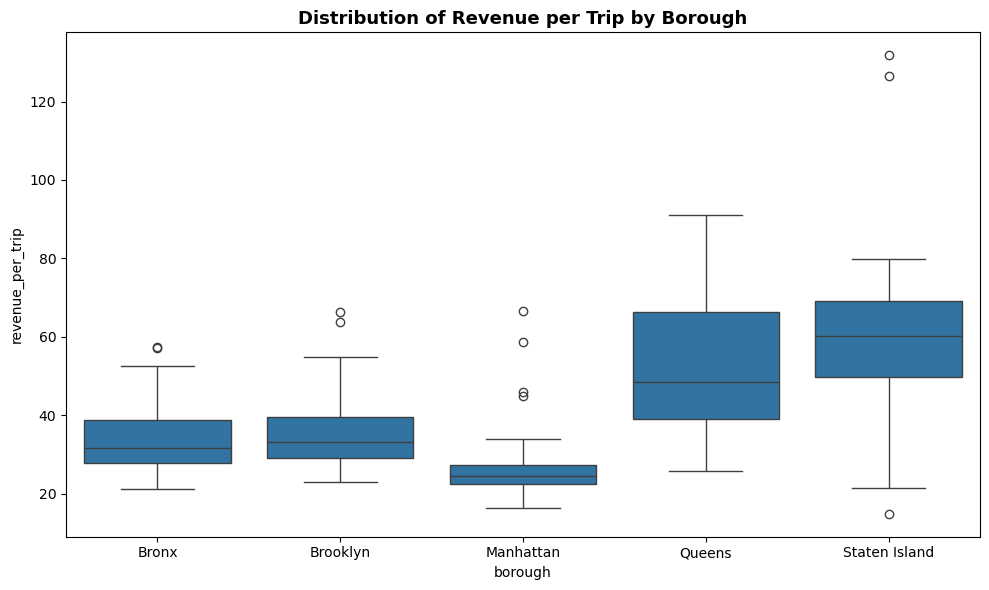

In [94]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df_final,
    x='borough',
    y='revenue_per_trip'
)
plt.title('Distribution of Revenue per Trip by Borough', fontweight='bold', fontsize=13)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Queens shows the largest IQR -> High Dispersion available in trip revenue.
### Manhattan Shows more outliers -> Many Extreme high-fare trips, likely driven by occasional long-distance or premium trips.
#### Even before inference, the economic gap is large.

## Assumption Testing

### Normality of Residuals

In [63]:
model_rev = ols('revenue_per_trip ~ C(borough)', data=df_final).fit()
residuals_rev = model_rev.resid

shapiro_rev = stats.shapiro(residuals_rev)
print('Shapiro-Wilk P-Value:', shapiro_rev.pvalue)

Shapiro-Wilk P-Value: 3.184461996208617e-12


#### Residuals are not normally distributed.

# Homogeneity of Variance

In [79]:
groups_rev = [group['revenue_per_trip'].values for name, group in df_final.groupby('borough')]
levene_rev = stats.levene(*groups_rev)
print('Levene Test P-Value:', levene_rev.pvalue)

Levene Test P-Value: 1.7166009543788034e-11


#### Classical ANOVA Assumptions are violated!

In [65]:
# One-Way ANOVA
anova_model_rev = ols('revenue_per_trip ~ C(borough)', data=df_final).fit()
anova_table_rev = sm.stats.anova_lm(anova_model_rev, typ=2)
print(anova_table_rev)

                  sum_sq     df          F        PR(>F)
C(borough)  35164.764472    4.0  46.101516  4.278751e-29
Residual    48435.772918  254.0        NaN           NaN


#### F(4,254) = 46.10
#### P-Value = 4.28e-29
#### This is Extremely Significant.
#### Decision: Reject Null Hypothesis (H0)
#### Revenue efficiency differs significantly across boroughs.

In [70]:
# Effect Size
anova_sum_rev = anova_table_rev['sum_sq']
eta_squared_rev = anova_sum_rev[0] / sum(anova_sum_rev)
print('Eta Squared: ', eta_squared_rev)

Eta Squared:  0.42062845012292693


#### 42.1$ of the total variation in revenue per trip is explained by borough.
#### LARGE EFFECT SIZE
### Earlier:
#### Operational performance (avg_distance) -> n^2 ~ 0.37
#### Revenue Efficiency -> n^2 ~ 0.42
#### Revenue differences are even more geographically structured than trip distance differences.

In [69]:
# Post-Hoc
tukey_rev = pairwise_tukeyhsd(
    endog=df_final['revenue_per_trip'],
    groups=df_final['borough'],
    alpha=0.05
)

print(tukey_rev)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1      group2    meandiff p-adj   lower    upper  reject
---------------------------------------------------------------
    Bronx      Brooklyn   1.2798 0.9903  -6.2749  8.8345  False
    Bronx     Manhattan  -7.5189  0.045 -14.9324 -0.1054   True
    Bronx        Queens  18.7636    0.0  11.3922  26.135   True
    Bronx Staten Island  27.6081    0.0  17.1565 38.0598   True
 Brooklyn     Manhattan  -8.7987 0.0035 -15.5131 -2.0844   True
 Brooklyn        Queens  17.4838    0.0   10.816 24.1516   True
 Brooklyn Staten Island  26.3283    0.0  16.3604 36.2962   True
Manhattan        Queens  26.2825    0.0  19.7751 32.7899   True
Manhattan Staten Island   35.127    0.0  25.2657 44.9883   True
   Queens Staten Island   8.8445 0.1003  -0.9852 18.6742  False
---------------------------------------------------------------


#### There is no Significant Difference in:
##### Bronx vs Brooklyn
##### Queens vs Staten Island

#### There is Significant Difference in:
##### Manhattan generates significantly less revenue per trip than:
##### Bronx / Brooklyn / Queens / Staten Island
##### Queens and Staten Island generate dramatically higher revenue per trip than:
##### Bronx / Brooklyn / Manhattan
##### Bronx and Manhattan are statistically similar.


### Structural Economic Hierarchy
#### Lowest Revenue Tier
##### -> Manhattan
#### Mid Revenue Tier
##### -> Bronx and Brooklyn
#### High Revenue Tier
##### -> Queens and Staten Island

In [71]:
# Robust Alternative (If Assumptions Fail lets say)
kruskal_rev = stats.kruskal(*groups_rev)
print('Kruskal-Wallis P-Value:', kruskal_rev.pvalue)

Kruskal-Wallis P-Value: 4.981038768026908e-27


#### Because ANOVA Assumptions were violated, this confirmation is crucial.

### This Suggests: Geography influences revenue even more strongly than it influences trip distance.

## Report Statement
A One-Way ANOVA was conducted to assess whether revenue efficiency, measured by revenue_per_trip, differs across boroughs.
Results indicate a statistically significant effect of geography on revenue efficiency, F(4,254) = 46.10, p < 0.001. The effect size was large (n^2 = 0.421), suggesting that approximately 42% of the variation in revenue per trip is explained by borough-level differences.

Although assumptions of normality and homogeneity of variance were violated, a Kruskal-Wallis test confirmed the findings (p < 0.0001), indicating robust geographic differences.

Post-Hoc comparisons reveal a clear revenue hierarchy: Manhattan generates significantly lower revenue per trip compared to all other boroughs, while Queens and Staten Island generate significantly higher revenue per trip. Bronx and Brooklyn form a statistically similar mid-tier group.

These findings demonstrate that revenue efficiency in NYC taxi operations is strongly geographically structured and cannot be explained solely by random variation.

### Is Higher Revenue in Queens and Staten Island driven primarily by longer trip distance, or by higher revenue per Mile?

In [88]:
borough_metrics = df_final.groupby('borough').agg(
    avg_revenue_per_trip = ('revenue_per_trip', 'mean'),
    avg_distance = ('avg_distance', 'mean'),
    avg_revenue_per_mile = ('revenue_per_mile', 'mean')
).reset_index()

borough_metrics

,borough,avg_revenue_per_trip,avg_distance,avg_revenue_per_mile
0,Bronx,33.951137,5.328437,6.550463
1,Brooklyn,35.230973,4.605529,7.817157
2,Manhattan,26.432247,2.927924,9.650453
3,Queens,52.714774,6.315016,9.220577
4,Staten Island,61.559274,9.013461,8.166533


In [89]:
# Distance vs Revenue Per Trip

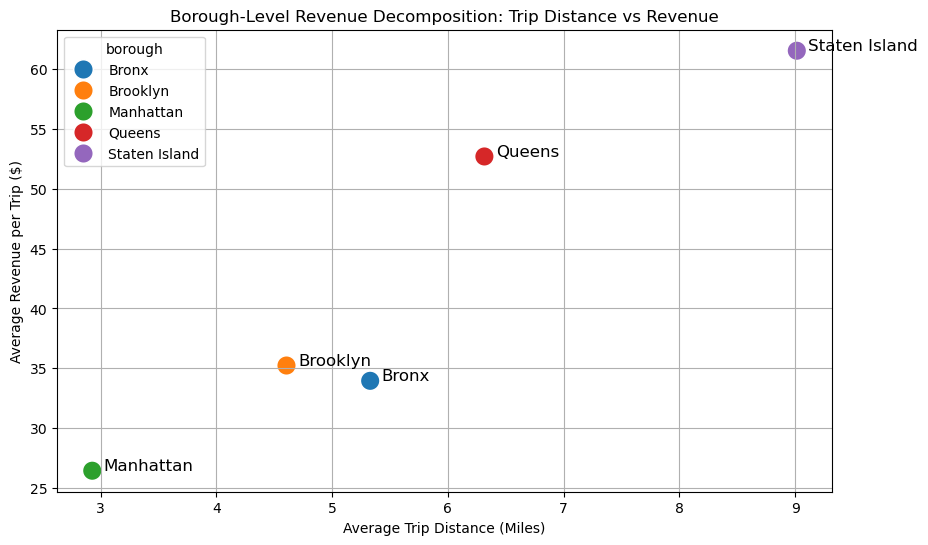

In [90]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=borough_metrics,
    x='avg_distance',
    y='avg_revenue_per_trip',
    hue='borough',
    s=200,
    palette='tab10'
)
for i, row in borough_metrics.iterrows():
    plt.text(row['avg_distance']+0.1, row['avg_revenue_per_trip'], row['borough'], fontsize=12)

plt.xlabel('Average Trip Distance (Miles)')
plt.ylabel('Average Revenue per Trip ($)')
plt.title('Borough-Level Revenue Decomposition: Trip Distance vs Revenue')
plt.grid(True)
plt.show()

In [91]:
# Revenue per Mile vs Revenue per Trip

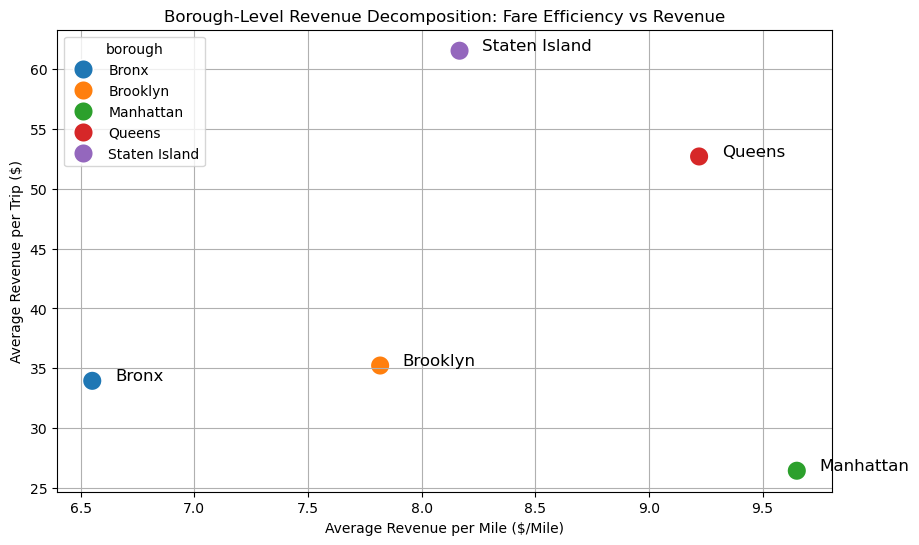

In [92]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=borough_metrics,
    x='avg_revenue_per_mile',
    y='avg_revenue_per_trip',
    hue='borough',
    s=200,
    palette='tab10'
)
for i, row in borough_metrics.iterrows():
    plt.text(row['avg_revenue_per_mile']+0.1, row['avg_revenue_per_trip'], row['borough'], fontsize=12)
plt.xlabel('Average Revenue per Mile ($/Mile)')
plt.ylabel('Average Revenue per Trip ($)')
plt.title('Borough-Level Revenue Decomposition: Fare Efficiency vs Revenue')
plt.grid(True)
plt.show()

#### Boroughs like Queens and Staten Island with high revenue per mile confirm that pricing efficiency drives revenue, not just distance.

In [93]:
# Correlation Analysis
corr_distance = df_final.groupby('borough')[['avg_distance','revenue_per_trip']].corr().iloc[0::2,-1]
corr_efficiency = df_final.groupby('borough')[['revenue_per_mile', 'revenue_per_trip']].corr().iloc[0::2,-1]

print('Correlation of Trip Distance vs Revenue per Trip:')
print(corr_distance)

print('\nCorrelation of Revenue per Mile vs Revenue per Trip:')
print(corr_efficiency)

Correlation of Trip Distance vs Revenue per Trip:
borough                    
Bronx          avg_distance    0.934955
Brooklyn       avg_distance    0.856604
Manhattan      avg_distance    0.804281
Queens         avg_distance    0.518357
Staten Island  avg_distance    0.119478
Name: revenue_per_trip, dtype: float64

Correlation of Revenue per Mile vs Revenue per Trip:
borough                        
Bronx          revenue_per_mile   -0.398823
Brooklyn       revenue_per_mile   -0.017419
Manhattan      revenue_per_mile   -0.305943
Queens         revenue_per_mile    0.450736
Staten Island  revenue_per_mile    0.713403
Name: revenue_per_trip, dtype: float64


### Statistical Testing

#### Distance-Driven Revenue

In [99]:
import statsmodels.formula.api as smf
model_distance = smf.ols('revenue_per_trip ~ avg_distance', data=df_final).fit()
print(model_distance.summary())

                            OLS Regression Results                            
Dep. Variable:       revenue_per_trip   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     219.2
Date:                Wed, 18 Feb 2026   Prob (F-statistic):           2.77e-36
Time:                        03:30:48   Log-Likelihood:                -1035.7
No. Observations:                 259   AIC:                             2075.
Df Residuals:                     257   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       16.8083      1.730      9.717   

## Final Report

This notebook analyzed the geographic distribution of trips and revenue generation patterns to identify high-demand and high-value zones. 
The analysis revealed that trip activity and revenue are heavily clustered in specific zones, with some areas generating high trip volumes while others produce higher average revenue per trip. These findings highlight the uneven geographic distribution of demand and profitability. Overall, the analysis provides actionable insights for driver allocation, pricing strategies, and operational optimization, demonstrating how spatial patterns directly influence revenue performance.